# Expertiments with directed and undirected graphs

( This is done using my sage310 or kerasenv3.10.6 environment )

In [1]:
%matplotlib inline

import scipy
import scipy.io
import pickle
import numpy as np
from scipy.spatial.distance import pdist, squareform
import networkx as nx
import matplotlib.pyplot as plt
from random import choice
import seaborn as sns
import time
from sklearn.decomposition  import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import sklearn as sk
import random
import pprint
import numpy as np
import warnings



import helper_common_files as HCF


rand_state = 42
np.random.seed(rand_state)

In [41]:
kcorre_names = ( '1orbit-2-corre-dict', '1orbit-3-corre-dict', '1orbit-4-corre-dict', '1orbit-5-corre-dict', '1orbit-6-corre-dict') 

handle = open('datasets-random-graphs/megadump-random-graphs-features-1000-11-0.4.pickle', 'rb')
raw_dataset = pickle.load(handle)

In [42]:
dataset = raw_dataset[1]


# !!!!!!!!!!!!!!!!!! 
# dataset = {}
# this creates collisions in the skew spectras
#for kcorre_name in kcorre_names:
#   dataset[kcorre_name]=make_example(megadataset[1][kcorre_name], stop_at_length=10)




Let's create the table that is used to build the graph data structure

In [43]:
# Are you sure you want to run this? Very slow. 
##### TRIGGER LENTEZZA!!!
#T_test = create_T_table_2(dataset)


##### THIS IS THE FAST ALGORITHM
T = HCF.create_T_table(dataset, kcorre_names)

# print(T['1orbit-2-corre-dict'])
# pprint.pprint(T['1orbit-3-corre-dict'])
# pprint.pprint(T['1orbit-4-corre-dict'])
# pprint.pprint(T['1orbit-5-corre-dict'])
# print(len(T['1orbit-2-corre-dict']))



Create graph data structure from table

In [6]:
G = HCF.build_networkx_graph(T, maxk=5)

#### Let's find nodes or edges that are not linked to the main tree.

In [7]:
G_bfs = nx.bfs_tree(G, (0,0))
print(G.number_of_nodes(), G_bfs.number_of_nodes())
print(G.number_of_edges(), G_bfs.number_of_edges())

4203 4203
4409 4202


What's left in the graph if we remove the BFS?

In [8]:
G_leftover = HCF.graph_subtraction_nodes(G, G_bfs)

try:
    random_node = choice(list(G_leftover.nodes))
    print(random_node)
except Exception as e:
    print(e)

list index out of range


In [9]:

G_leftover_edges = HCF.graph_subtraction_edges(G, G_bfs)


try:
    random_edge = choice(list(G_leftover_edges.edges))
    print(random_edge)
except Exception as e:
    print(e)

print(len(G_leftover_edges.edges()))
pprint.pprint(G_leftover_edges.edges())


((5, 307), (6, 547, 389, 175, 48, 17, 307, 435))
207
OutEdgeView([((5, 869), (6, 1, 869)), ((5, 75), (6, 771, 7, 265, 106, 75)), ((5, 106), (6, 771, 7, 265, 106, 75)), ((5, 265), (6, 771, 7, 265, 106, 75)), ((5, 771), (6, 771, 7, 265, 106, 75)), ((5, 108), (6, 10, 108)), ((5, 119), (6, 360, 465, 12, 119)), ((5, 360), (6, 360, 465, 12, 119)), ((5, 465), (6, 360, 465, 12, 119)), ((5, 554), (6, 554, 13)), ((5, 716), (6, 880, 716, 15)), ((5, 880), (6, 880, 716, 15)), ((5, 48, 435, 175), (6, 547, 389, 175, 48, 17, 307, 435)), ((5, 307), (6, 547, 389, 175, 48, 17, 307, 435)), ((5, 389), (6, 547, 389, 175, 48, 17, 307, 435)), ((5, 547), (6, 547, 389, 175, 48, 17, 307, 435)), ((5, 258), (6, 258, 20)), ((5, 197), (6, 197, 23)), ((5, 201), (6, 484, 201, 27, 478, 959)), ((5, 478), (6, 484, 201, 27, 478, 959)), ((5, 484), (6, 484, 201, 27, 478, 959)), ((5, 959), (6, 484, 201, 27, 478, 959)), ((5, 104), (6, 104, 29)), ((5, 32), (6, 32, 70, 447)), ((5, 245), (6, 33, 245, 335)), ((5, 737), (6, 40, 73

What we say before is very sad... :( 
    OutEdgeView([((4, 814), (5, 67, 814))

In [10]:
print(nx.is_directed_acyclic_graph(G_bfs))
print(nx.is_tree(G_bfs))

print(nx.is_directed_acyclic_graph(G))
print(nx.is_tree(G))

True
True
True
False


## Let's plot the tree! 

You can play with different numbe of iterations and figsize

In [11]:
#pos = nx.spring_layout(G_bfs, iterations=50)
#plt.figure(figsize=(200,200)) 
#nx.draw(G_bfs, pos,  with_labels=True, font_size=8)

In [12]:
#pos = nx.spring_layout(G_bfs, iterations=100)
#plt.figure(figsize=(200,200)) 
#nx.draw(G_bfs, pos,  with_labels=True, font_size=8)

## Do we lose distinguishing capabilities increasing k for the k-reduced-skew-spectrum?
(yes.)

How do we see it?

### Let's play the lottery ticket.
Searching for graphs that we can discriminate only by using k correlation for k> 2

In [45]:
histogram, hits, lottery_tickets = HCF.count_bifurcations(G_bfs, kcorre_names)       

print("\n\nWe have {} lottery tickets, i.e. graphs we distinguish with skew spectra of size k>3 ".format(len(lottery_tickets)))

pprint.pprint(histogram)

print("The number of nodes is ", G_bfs.number_of_nodes())
print("The number of graphs is ", len(megadataset[0]))
lottery_ticket = random.choice(lottery_tickets)

print("The lottery tickets are:")
print(lottery_tickets)




We have 17 lottery tickets, i.e. graphs we distinguish with skew spectra of size k>3 
{'1orbit-0-corre-dict': 632,
 '1orbit-2-corre-dict': 469,
 '1orbit-3-corre-dict': 34,
 '1orbit-4-corre-dict': 0,
 '1orbit-5-corre-dict': 0,
 '1orbit-6-corre-dict': 0}
The number of nodes is  4203
The number of graphs is  1000
The lottery tickets are
[(3, 813, 13), (3, 660, 29), (3, 45, 295), (3, 773, 206), (3, 793, 894), (3, 417, 189), (3, 123, 820), (3, 577, 165, 735), (3, 336, 474, 951), (3, 884, 549), (3, 169, 428), (3, 384, 912), (3, 212, 622), (3, 753, 262), (3, 285, 358), (3, 420, 375), (3, 461, 607)]


Let's print some of those lottery tickets

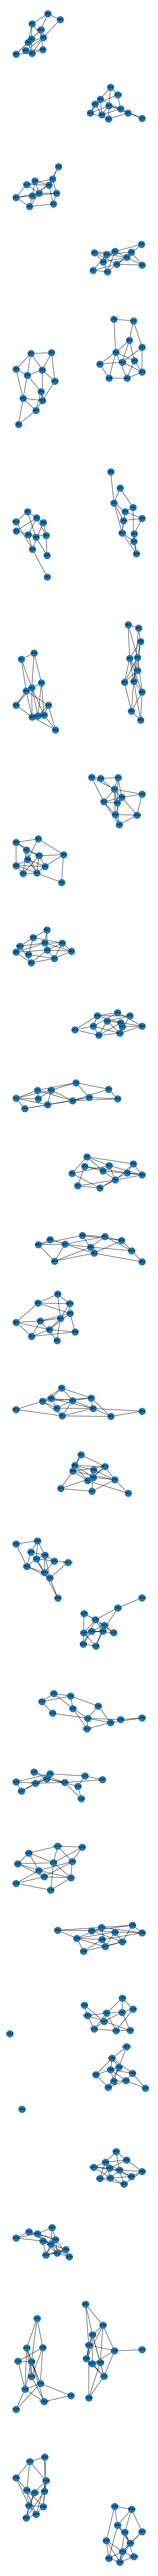

In [30]:
fig, axs = plt.subplots(nrows=len(lottery_tickets), figsize=(7, 7*len(lottery_tickets)))
for i, ticket in enumerate(lottery_tickets):
    newgraph = nx.union(megadataset[0][ticket[1]], megadataset[0][ticket[2]], rename=("{}A".format(i), "{}B".format(i)))
    pos = nx.spring_layout(newgraph, iterations=20)
    #plt.figure(figsize=(7,7)) 
    #axs[i].imshow()
    nx.draw(newgraph, pos,  with_labels=True, font_size=8, ax=axs[i])

In [21]:
sfortunelli = []
for node in G_bfs:
    if node[0] == 6:
        if len(node) > 2:
            sfortunelli.append(node)

print(len(sfortunelli))
sfortunelli.pop()
print(sfortunelli)

155
[(6, 1, 869), (6, 167, 47), (6, 771, 7, 265, 106, 75), (6, 10, 108), (6, 360, 465, 12, 119), (6, 554, 13), (6, 813, 525, 848, 732, 606), (6, 416, 480, 834, 325, 873, 565, 317), (6, 210, 563), (6, 880, 716, 15), (6, 32, 70, 447), (6, 968, 641, 690, 283), (6, 580, 895), (6, 547, 389, 175, 48, 17, 307, 435), (6, 964, 69, 85, 183, 574), (6, 258, 20), (6, 197, 23), (6, 857, 569), (6, 304, 917), (6, 484, 201, 27, 478, 959), (6, 104, 29), (6, 660, 76), (6, 33, 245, 335), (6, 485, 767), (6, 620, 591), (6, 329, 886, 702), (6, 866, 669), (6, 843, 862), (6, 68, 518), (6, 40, 737), (6, 699, 172), (6, 743, 987, 295), (6, 300, 989, 142), (6, 697, 507, 190), (6, 290, 877, 661, 399), (6, 903, 501, 909, 693), (6, 536, 714, 458), (6, 362, 51, 302, 231), (6, 176, 585, 573, 151), (6, 448, 582, 166, 184, 636), (6, 576, 787, 204, 206), (6, 773, 406), (6, 305, 55), (6, 546, 59), (6, 627, 214), (6, 281, 62, 865), (6, 379, 612), (6, 924, 253), (6, 977, 700, 711), (6, 67, 814, 885, 533, 223), (6, 216, 71), 

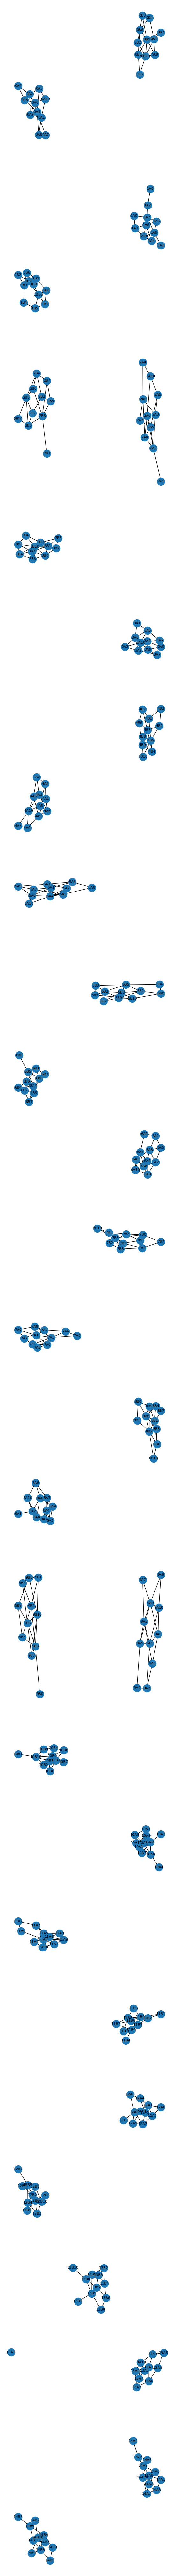

In [29]:
limit = 15
fig, axs = plt.subplots(nrows=len(sfortunelli[:limit]), figsize=(7, 7*len(sfortunelli[:limit])))
for i, ticket in enumerate(sfortunelli[:limit]):
    newgraph = nx.union(megadataset[0][ticket[1]], megadataset[0][ticket[2]], rename=("{}A".format(i), "{}B".format(i)))
    pos = nx.spring_layout(newgraph, iterations=50)
    #plt.figure(figsize=(7,7)) 
    #axs[i].imshow()
    nx.draw(newgraph, pos, ax=axs[i],  with_labels=True, font_size=8)

# Let's see if all the leaves have only one entry in the label

In [37]:
leaves = [x for x in G_bfs.nodes() if G_bfs.out_degree(x)==0]
non_separated_leaves = [x for x in G_bfs.nodes() if G_bfs.out_degree(x)==0 and len(x) > 2]   # > or >=? 
non_separated_leaves_lastk = [x for x in G_bfs.nodes() if G_bfs.out_degree(x)==0 and len(x) > 2 and x[0]==6 ]   # > or >=? 

print("Number of non separated leaves {}".format(len(non_separated_leaves)))
print("Number of non separated leaves at layer 6 {}".format(len(non_separated_leaves_lastk)))

print(non_separated_leaves)
print(non_separated_leaves[0])

###
# 
# 
# 
# 
# WAIT A SECOND MAYBE THERE IS A PROBLEM HERE>... Maybe i sould not use bfs?!!?!


Number of non separated leaves 174
Number of non separated leaves at layer 6 155
[(4, 517, 502), (4, 588, 878), (5, 48, 435, 175), (5, 501, 903), (5, 329, 702), (5, 819, 141), (5, 144, 970), (5, 800, 171), (5, 184, 582, 448), (5, 276, 598), (5, 288, 916, 286), (5, 926, 364, 566), (5, 386, 858), (5, 947, 366), (5, 480, 873, 565), (5, 739, 492), (5, 872, 596), (5, 877, 661), (5, 810, 851), (6, 1, 869), (6, 167, 47), (6, 771, 7, 265, 106, 75), (6, 10, 108), (6, 360, 465, 12, 119), (6, 554, 13), (6, 813, 525, 848, 732, 606), (6, 416, 480, 834, 325, 873, 565, 317), (6, 210, 563), (6, 880, 716, 15), (6, 32, 70, 447), (6, 968, 641, 690, 283), (6, 580, 895), (6, 547, 389, 175, 48, 17, 307, 435), (6, 964, 69, 85, 183, 574), (6, 258, 20), (6, 197, 23), (6, 857, 569), (6, 304, 917), (6, 484, 201, 27, 478, 959), (6, 104, 29), (6, 660, 76), (6, 33, 245, 335), (6, 485, 767), (6, 620, 591), (6, 329, 886, 702), (6, 866, 669), (6, 843, 862), (6, 68, 518), (6, 40, 737), (6, 699, 172), (6, 743, 987, 295)

Let's pick a lottery_ticket: i.e. a graph that we can distinguish using k-correlation that is bigger than 2.

In [ ]:

print("Are the two graph isomorphic? (We believe not, as they can be distinguished k+1 correlation):", nx.is_isomorphic(megadataset[0][lottery_ticket[1]], megadataset[0][lottery_ticket[2]]))
print("Are the 3-correlations the same?", np.allclose(megadataset[1]['1orbit-3-corre-dict'][lottery_ticket[1]], megadataset[1]['1orbit-3-corre-dict'][lottery_ticket[2]]))
print("Are the 4-correlations the same?",  np.allclose(megadataset[1]['1orbit-4-corre-dict'][lottery_ticket[1]], megadataset[1]['1orbit-4-corre-dict'][lottery_ticket[2]]))
print("Let's print the difference between the two 4 correlations")
print(megadataset[1]['1orbit-4-corre-dict'][lottery_ticket[1]]- megadataset[1]['1orbit-4-corre-dict'][lottery_ticket[2]])

Are the two graph isomorphic? (We believe not, as they can be distinguished k+1 correlation): False
Are the 3-correlations the same? True
Are the 4-correlations the same? False
Let's print the difference between the two 4 correlations
[ 0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.      

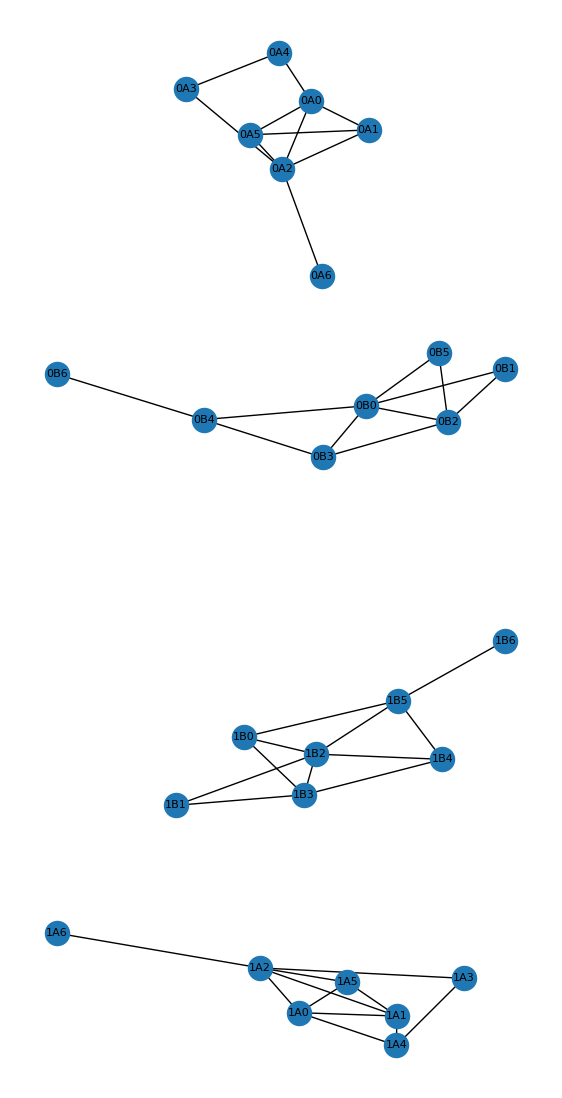

## The opposite game: searching for collisions.     

In [ ]:


# TODO understand if G or BFS?!!?!
# 
# 
# 
#  note very well that we do not use main_G anymore!!!!!!!!! we should use the original graph!! 
histogram, hits = HCF.count_collisions(G, kcorre_names)      

pprint.pprint(histogram)
print("Recall the number of nodes is ", main_G.number_of_nodes())
print("Recall the number of hits is ", len(hits))
print("Recall the number of graphs is ", len(megadataset[0]))
try:
    lottery_ticket = random.choice(hits)
except Exception as e:
    print("Cannot find a lottery ticket:", e)

{'1orbit-0-corre-dict': 0,
 '1orbit-2-corre-dict': 0,
 '1orbit-3-corre-dict': 0,
 '1orbit-4-corre-dict': 2,
 '1orbit-5-corre-dict': 3,
 '1orbit-6-corre-dict': 14,
 '1orbit-7-corre-dict': 392}
Recall the number of nodes is  5623
Recall the number of hits is  108
Recall the number of graphs is  1044


## Let's look at the edges that are in the graph but not in the tree.